In [1]:
import pandas as pd

def read_csv(filepath):
    df = pd.read_csv(filepath)
    return df

#Dataset imported from kaggle: https://www.kaggle.com/datasets/peopledatalabssf/free-7-million-company-dataset
df = read_csv("../datasets/companies_sorted.csv")

df.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960


### Parsing Data

As our population is centered around small businesses, we proposed the following definition:

* The company has less than `100` employees
* The company's `locality` is in `Boston`

In [32]:
df = df.loc[(df["current employee estimate"] <= 100) & (df["locality"].str.contains("boston"))]

df.head()

,Unnamed: 0,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
109955,6138942,admirals bank,admiralsbank.com,NaN,banking,51 - 200,"boston, massachusetts, united states",united states,linkedin.com/company/admirals-bank,100,368
110085,6513275,the general ®,NaN,1963.0,insurance,51 - 200,"boston, massachusetts, united states",united states,linkedin.com/company/permanent-general,100,148
110862,1962824,recall total information management pte ltd,NaN,1996.0,information services,201 - 500,"boston, massachusetts, united states",singapore,linkedin.com/company/cisco-recall,100,306
111593,6318257,boston harbor cruises,bostonharborcruises.com,1926.0,maritime,51 - 200,"boston, massachusetts, united states",united states,linkedin.com/company/boston-harbor-cruises,99,323
111645,455701,the colony group,thecolonygroup.com,1986.0,financial services,51 - 200,"boston, massachusetts, united states",united states,linkedin.com/company/the-colony-group,99,175


In [9]:
print(f"There are {df.size} small companies situated in Boston, Massachusetts")

There are 126709 small companies situated in Boston, Massachusetts


### Analyzing Industry Population in Boston
We decided to graph what industries are most prevalent among the small businesses to have a better intuition on trends and interests.

<AxesSubplot: title={'center': 'Number of Industry Type for Small Businesses in Boston Area'}, xlabel='Industry', ylabel='Count'>

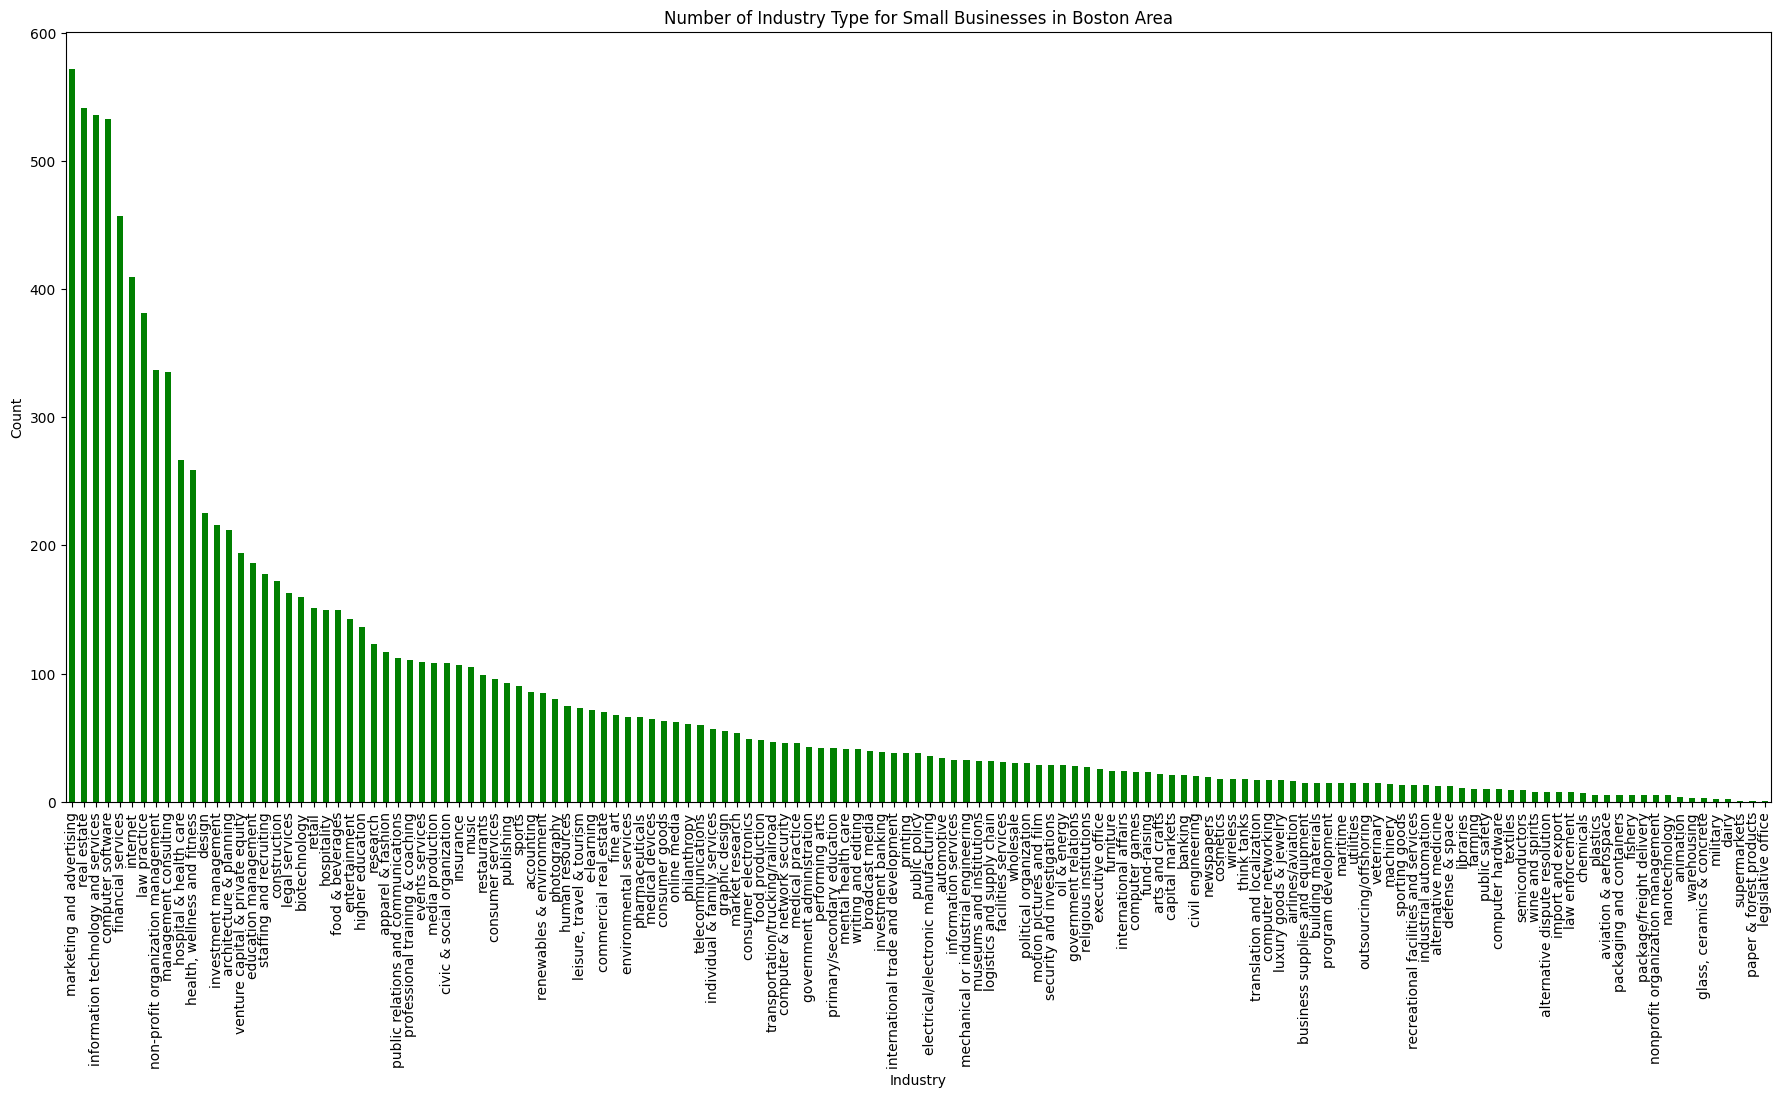

In [38]:
from tkinter import Y
import matplotlib.pyplot as plt

#getting industry names
x_elems = df["industry"].unique()

y_elems = df["industry"].count()


# plt.bar(x_elems, y_elems, color = "green")

# plt.xlabel("Industry")
# plt.ylabel("Count")
# plt.title("Industry Type for Small Businesses in Boston Area")

# plt.show()

df.groupby("industry")["industry"].count().sort_values(ascending=False).plot.bar(
    title = "Number of Industry Type for Small Businesses in Boston Area",
    color = "green",
    ylabel = "Count",
    xlabel = "Industry",
    figsize = (22,10)
)

We also printed the head for the 10 most small-company-related industries situated in Boston Area

In [39]:
df.groupby("industry")["industry"].count().sort_values(ascending = False).head(10)

industry
marketing and advertising              572
real estate                            541
information technology and services    536
computer software                      533
financial services                     457
internet                               409
law practice                           381
non-profit organization management     337
management consulting                  335
hospital & health care                 267
Name: industry, dtype: int64

### Analysis